In [8]:
# loading the data
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import csv
import numpy as np
from scipy import misc

CAR_DIR = './vehicles/'
NON_CAR_DIR = './non-vehicles/'

def load_examples(dir):
    examples = []
    for subdir in listdir(dir):
        try:
            for f_name in listdir(dir + subdir):
                try:
                    img = misc.imread(dir + subdir + '/' + f_name)
                    #if img.shape != (64, 64, 3) : print ("AAAAAAAA")
                    examples.append(img)
                except IOError: pass
        except NotADirectoryError: pass
    return examples

car_img = load_examples(CAR_DIR)
non_car_img = load_examples(NON_CAR_DIR)

print ("Car examples: ", len(car_img))
print ("Non-Car examples: ", len(non_car_img))




Car examples:  8792
Non-Car examples:  8968


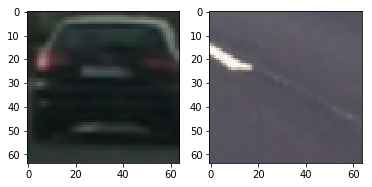

In [9]:
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(car_img[600])
plt.subplot(1,2,2)
plt.imshow(non_car_img[600])

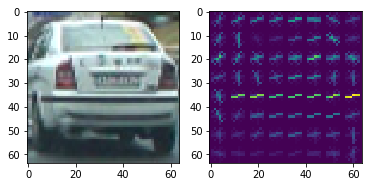

In [25]:
# getting the features
from skimage.feature import hog
import cv2

def hog_features(img):
    return hog(img, visualise=True)

def features_from_img(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)[:,:,1]
    vec = hog(img, visualise=False)
    return vec

img = car_img[2701]
vec, hogs = hog_features(cv2.cvtColor(img, cv2.COLOR_BGR2HLS)[:,:,1])
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(hogs)



In [29]:
# building the training sets
from sklearn.model_selection import train_test_split

car_features = [features_from_img(img) for img in car_img]
non_car_features = [features_from_img(img) for img in non_car_img]
features = car_features + non_car_features
labels = [1 for i in range(len(car_features))] + [0 for i in range(len(non_car_features))]
print (len(car_features), len(non_car_features))


X_train, X_test, y_train, y_test =  train_test_split(features, labels, test_size=0.15, random_state=999)

print('X_train:' , len(X_train))
print('X_test:' , len(X_test))
print('y_train:' , len(y_train))
print('y_test:' , len(y_test))

8792 8968
X_train: 15096
X_test: 2664
y_train: 15096
y_test: 2664


In [30]:
# training
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.83969263381
0.842717717718
